# Description:
 this notebook tests quality of Foursquare POIs by putting them vs the dataset of businesses in Tel Aviv from Tel Aviv data portal 

In [1]:
import geopandas as gpd

## 1. Get TA borders

In [ ]:
gdf_bound = gpd.read_file(
    "telaviv.geojson"
)

In [8]:
gdf_bound.head()

Muni_Eng                                           geometry
0  Tel Aviv - Yafo  POLYGON ((34.85077 32.1136, 34.85072 32.11359,...

<Axes: >

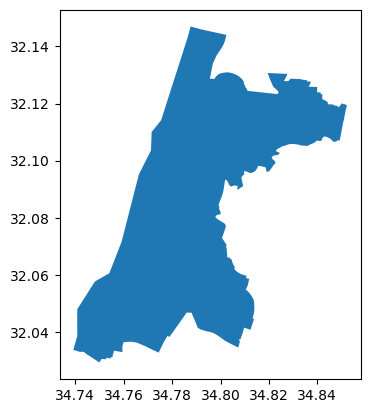

In [7]:
gdf_bound.plot()

## 2. Read datasets

In [2]:
frsq_gdf = gpd.read_file("../data/original/places_il_cleaned.geojson")

In [3]:
frsq_gdf.category_name.value_counts()

category_name
Café                         1167
Coffee Shop                   657
Hotel                         606
Middle Eastern Restaurant     597
Bakery                        576
                             ... 
Mental Health Service           1
Sauna                           1
Acupuncture Clinic              1
Marketplace                     1
Buddhist Temple                 1
Name: count, Length: 715, dtype: int64

In [101]:
frsq_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
ta_frsq_gdf = frsq_gdf.clip(gdf_bound.geometry.iloc[0])

In [9]:
ta_frsq_gdf.columns

Index(['id', 'name', 'address', 'keyword', 'type', 'component_id',
       'max_similarity', 'status', 'lat', 'lon', 'locality', 'region',
       'postcode', 'admin_region', 'post_town', 'po_box', 'country',
       'date_created', 'date_refreshed', 'date_closed', 'tel', 'website',
       'email', 'facebook_id', 'instagram', 'twitter', 'fsq_category_ids',
       'fsq_category_labels', 'placemaker_url', 'bbox', 'category_id',
       'category_level', 'category_name', 'category_label',
       'level1_category_id', 'level2_category_id', 'level3_category_id',
       'level3_category_name', 'level4_category_id', 'level4_category_name',
       'level5_category_id', 'level5_category_name', 'level6_category_id',
       'level6_category_name', 'empty_fields_share', 'duplicates_rank',
       'days_from_refresh', 'days_from_refresh_scaled',
       'empty_fields_share_scaled', 'confidence', 'confidence_score',
       'geometry'],
      dtype='object')

In [27]:
from folium.plugins import HeatMap
import folium
import numpy as np
# Generate sample latitude and longitude data
np.random.seed(42)



# Create a folium map centered around the data points
m = folium.Map(location=[33.75, 33.45], zoom_start=10, tiles="CartoDB positron")

# Add the heatmap layer
HeatMap(ta_frsq_gdf[["lat","lon"]].values,
        radius=9,
        blur=9
        ).add_to(m)

# Save to an HTML file (optional) or display in a Jupyter Notebook
m

In [18]:
ta_frsq_gdf.shape

(7596, 52)

In [104]:
ta_frsq_gdf.head(2)

id            name      address  \
16743  4efc0eb7722e35df66b9c750  Yellow הטייסים  דרך הטייסים   
20854  51a08c40498e8382f349c882    צומת הטייסים         None   

                      keyword                       type  component_id  \
16743            Fuel Station  Travel and Transportation       15783.0   
20854  Transportation Service  Travel and Transportation       15784.0   

       max_similarity status        lat        lon  ... level6_category_id  \
16743             1.0   open  32.045744  34.813215  ...               None   
20854             1.0   open  32.049738  34.813798  ...               None   

      level6_category_name empty_fields_share duplicates_rank  \
16743                 None           0.407407               1   
20854                 None           0.444444               1   

      days_from_refresh days_from_refresh_scaled empty_fields_share_scaled  \
16743               594                 0.375251                  0.727273   
20854               773                 0.494983                  0.818182   

      confidence confidence_score                   geometry  
16743   0.642478         0.642478  POINT (34.81322 32.04574)  
20854   0.550473         0.550473   POINT (34.8138 32.04974)  

[2 rows x 52 columns]

In [105]:
ta_frsq_gdf.columns

Index(['id', 'name', 'address', 'keyword', 'type', 'component_id',
       'max_similarity', 'status', 'lat', 'lon', 'locality', 'region',
       'postcode', 'admin_region', 'post_town', 'po_box', 'country',
       'date_created', 'date_refreshed', 'date_closed', 'tel', 'website',
       'email', 'facebook_id', 'instagram', 'twitter', 'fsq_category_ids',
       'fsq_category_labels', 'placemaker_url', 'bbox', 'category_id',
       'category_level', 'category_name', 'category_label',
       'level1_category_id', 'level2_category_id', 'level3_category_id',
       'level3_category_name', 'level4_category_id', 'level4_category_name',
       'level5_category_id', 'level5_category_name', 'level6_category_id',
       'level6_category_name', 'empty_fields_share', 'duplicates_rank',
       'days_from_refresh', 'days_from_refresh_scaled',
       'empty_fields_share_scaled', 'confidence', 'confidence_score',
       'geometry'],
      dtype='object')

In [15]:
ta_official_gdf = gpd.read_file("../data/original/business_ta.geojson")

In [16]:
ta_official_gdf.head(2)

oidrishayo  msesekrash  msesekmish tshemesek  \
0       108.0     63960.0         0.0     מתוקה   
1       109.0     63966.0         0.0    לנדוור   

                                          thesbermah tcategoria  krechov  \
0  מכירת דברי מאפה באריזה ובתפזורת  + חימום במיקר...       מזון    902.0   
1  4.2א - מסעדה - מקום הכנה או הגשת מזון לצריכה ב...       מזון      8.0   

   trechov  msbayit msknisa  ... trishaionl taarichkab taarichtok taarichtas  \
0    הברזל     20.0     nan  ...       None        nan       None        nan   
1  רוטשילד     41.0     nan  ...       None        nan       None        nan   

      tktovet xcoord ycoord  \
0    הברזל 20   None   None   
1  רוטשילד 41   None   None   

                                             mahuiot           dateimport  \
0  מכירת דברי מאפה באריזה ובתפזורת  + חימום במיקר...  26/02/2025 01:11:35   
1  מסעדה (ללא דגים)אפייה מבצק מוכן ומוקפא-לרבות צ...  26/02/2025 01:11:35   

                    geometry  
0  POINT (34.83887 32.10808)  
1  POINT (34.77434 32.06414)  

[2 rows x 22 columns]

In [17]:
ta_official_gdf.shape

(7931, 22)

## 3. Process Official dataset

In [18]:
column_mapping = {
    "oidrishayo": "business_id",  # Unique Business ID
    "msesekrash": "registration_number",  # Business Registration Number
    "msesekmish": "sub_registration",  # Secondary Business Registration
    "tshemesek": "business_name",  # Business Name
    "thesbermah": "business_description",  # Business Activity Description
    "tcategoria": "business_category",  # Business Category
    "krechov": "street_code",  # Street Code
    "trechov": "street_name",  # Street Name
    "msbayit": "house_number",  # House Number
    "msknisa": "entrance_number",  # Entrance Number
    "tktovet": "full_address",  # Full Address
    "trishaionl": "license_status",  # Licensing Status (uncertain)
    "taarichkab": "registration_date",  # Business Registration Date
    "taarichtok": "license_expiry_date",  # License Expiry Date
    "taarichtas": "last_update_date",  # Last Update Date
    "xcoord": "longitude",  # Longitude
    "ycoord": "latitude",  # Latitude
    "geometry": "geometry",  # Geospatial Data
    "mahuiot": "detailed_activity",  # More Detailed Business Activity
    "dateimport": "data_import_date",  # Data Import Timestamp
}

In [19]:
ta_official_gdf = ta_official_gdf.rename(columns=column_mapping)

In [20]:
ta_official_gdf["business_category"].unique()

array(['מזון', 'בריאות, רוקחות, קוסמטיקה', 'מסחר ושונות', 'רכב ותחבורה',
       'תעשיה, כימיה, מחצב', 'עינוג ציבורי כללי', 'מים ופסולת',
       'חקלאות ובעלי חיים', 'nan', 'שרותי שמירה ואבטחה', 'דלק ואנרגיה'],
      dtype=object)

In [21]:
category_mapping = {
    "מזון": "Food",
    "בריאות, רוקחות, קוסמטיקה": "Health, Pharmacy, Cosmetics",
    "מסחר ושונות": "Commerce and Miscellaneous",
    "רכב ותחבורה": "Automotive and Transportation",
    "תעשיה, כימיה, מחצב": "Industry, Chemistry, Minerals",
    "עינוג ציבורי כללי": "General Public Entertainment",
    "מים ופסולת": "Water and Waste Management",
    "חקלאות ובעלי חיים": "Agriculture and Livestock",
    "nan": None,  # If this represents missing values
    "שרותי שמירה ואבטחה": "Security and Guard Services",
    "דלק ואנרגיה": "Fuel and Energy",
}
ta_official_gdf["business_category"] = ta_official_gdf["business_category"].map(
    category_mapping
)

## 4. Compare Basic features

In [106]:
ta_frsq_gdf["business_category"] = ta_frsq_gdf["keyword"]

In [ ]:
import pandas as pd

ta_frsq_gdf = ta_frsq_gdf[
    ta_frsq_gdf["fsq_category_labels"].apply(
        lambda x: True if pd.isnull(x) else "Office" not in x
    )
]

In [108]:
import pandas as pd
from shapely.geometry import Point


def compare_datasets_totals(
    df1, df2, name1="Dataset 1", name2="Dataset 2", match_distance=50
):
    """
    Compare two POI datasets on key completeness metrics.

    Parameters:
    - df1, df2: GeoDataFrames containing POIs
    - name1, name2: Names of the datasets for output labeling
    - match_distance: Maximum distance (in meters) to consider two POIs as matching

    Returns:
    - DataFrame with completeness comparison results
    """
    # Ensure geometries are Points
    df1 = df1[df1.geometry.apply(lambda g: isinstance(g, Point))]
    df2 = df2[df2.geometry.apply(lambda g: isinstance(g, Point))]

    # Define metrics dictionary
    comparison = {
        "Total POIs": {name1: len(df1), name2: len(df2)},
        "Non-Empty Attributes (Avg)": {
            name1: df1.notna().sum(axis=1).mean(),
            name2: df2.notna().sum(axis=1).mean(),
        },
        "Unique Categories": {
            name1: df1["business_category"].nunique(),
            name2: df2["business_category"].nunique(),
        },
        "Unique Locations (Lat/Lon)": {
            name1: df1[["geometry"]].drop_duplicates().shape[0],
            name2: df2[["geometry"]].drop_duplicates().shape[0],
        },
    }

    # Convert to DataFrame for display
    comparison_df = pd.DataFrame(comparison)

    return comparison_df


# Assuming `gdf_foursquare` and `gdf_official` are the two datasets you want to compare

In [109]:
compare_datasets_totals(
    ta_frsq_gdf, ta_official_gdf, name1="Foursquare", name2="Official Data"
)

Total POIs  Non-Empty Attributes (Avg)  Unique Categories  \
Foursquare           7189                   34.897065                239   
Official Data        7931                   17.964948                 10   

               Unique Locations (Lat/Lon)  
Foursquare                           7174  
Official Data                        4423

## 5. Do sjoin using hex and analyse how many spatial intersections exist

In [110]:
import h3

In [223]:
def compare_poi_hex_statistics_df(
    df1, df2, name1="Dataset 1", name2="Dataset 2", resolution=8
):
    """
    Compare two POI datasets by aggregating points into H3 hexagons.
    Returns a DataFrame summarizing hex match statistics for each dataset.

    Parameters:
    - df1, df2: GeoDataFrames containing POIs
    - name1, name2: Names of the datasets for labeling results
    - resolution: H3 hex resolution level (default = 8, moderate detail)

    Returns:
    - A summary DataFrame showing hex match statistics for each dataset as a row.
    """
    try:
        import h3  # Ensure H3 is available
    except ImportError:
        raise Exception(
            "H3 library is not installed. Install it using 'pip install h3'"
        )

    # Function to convert geometries to H3 hexes
    def convert_to_hex(geometry, resolution):
        if isinstance(geometry, Point):
            return h3.latlng_to_cell(
                geometry.y, geometry.x, resolution
            )  # Updated function
        return None

    # Convert geometries to H3 hexagons
    df1["hex"] = df1["geometry"].apply(lambda geom: convert_to_hex(geom, resolution))
    df2["hex"] = df2["geometry"].apply(lambda geom: convert_to_hex(geom, resolution))

    # Count POIs per hex in each dataset
    hex_counts1 = (
        df1["hex"]
        .value_counts()
        .rename(name1)
        .reset_index()
        .rename(columns={"index": "hex"})
    )
    hex_counts2 = (
        df2["hex"]
        .value_counts()
        .rename(name2)
        .reset_index()
        .rename(columns={"index": "hex"})
    )

    # Perform an outer merge on hex values to compare counts
    hex_comparison = hex_counts1.merge(hex_counts2, on="hex", how="outer")

    # Calculate statistics for each dataset
    summary_dict = {
        "Dataset": [name1, name2],
        "Total Hexes": [
            sum(hex_comparison[name1].notnull()),
            sum(hex_comparison[name2].notnull()),
        ],
        "Fully Matching Hexes": [sum(hex_comparison[name1] == hex_comparison[name2])]
        * 2,
        "Hexes present in 2 datasets": [
            sum((~hex_comparison[name1].isnull()) & (~hex_comparison[name2].isnull()))
        ]
        * 2,
        "Hexes Where POI Count is Higher": [
            sum(hex_comparison[name1] > hex_comparison[name2]),
            sum(hex_comparison[name2] > hex_comparison[name1]),
        ],
        "Hexes Where POI Count is Lower": [
            sum(hex_comparison[name1] < hex_comparison[name2]),
            sum(hex_comparison[name2] < hex_comparison[name1]),
        ],
    }

    # Convert summary to DataFrame for display
    hex_summary_df = pd.DataFrame(summary_dict)

    return hex_summary_df, hex_comparison

In [ ]:

df_hex_summary,_ = compare_poi_hex_statistics_df(
    ta_frsq_gdf,
    ta_official_gdf,
    name1="Foursquare",
    name2="Official Data",
    resolution=10,
)
df_hex_summary

Dataset  Total Hexes  Fully Matching Hexes  \
0     Foursquare         1442                   135   
1  Official Data         1141                   135   

   Hexes present in 2 datasets  Hexes Where POI Count is Higher  \
0                          904                              328   
1                          904                              441   

   Hexes Where POI Count is Lower  
0                             441  
1                             328

## 6. Match categories

In [ ]:
ta_frsq_gdf["business_category"].unique().tolist()

['Fuel Station',
 'Transportation Service',
 'Food Court',
 'Racquet Sports',
 'Bakery',
 'Restaurant',
 'Business Service',
 'Health and Beauty Service',
 'Miscellaneous Store',
 'Dessert Shop',
 'Gym and Studio',
 'Park',
 'States and Municipalities',
 'Medical Center',
 'Event Space',
 'Marketplace',
 'Cafe, Coffee, and Tea House',
 'Food and Beverage Retail',
 'Computers and Electronics Retail',
 'Laundry Service',
 'Education',
 'Financial Service',
 'Automotive Service',
 'Road',
 'Government Building',
 'Transport Hub',
 None,
 'Convention',
 'Performing Arts Venue',
 'Parking',
 'Skating',
 'Structure',
 'Factory',
 'Department Store',
 'Furniture and Home Store',
 'Construction Supplies Store',
 'Art Gallery',
 'Stadium',
 'Museum',
 'Travel Agency',
 'Moving Target',
 'Cemetery',
 'Night Club',
 'Bar',
 'Lodging',
 'Platform',
 'Other Great Outdoors',
 'Food Truck',
 'Public Art',
 'Fashion Retail',
 'Library',
 'Snack Place',
 'Prison',
 'Design Studio',
 'Water Park',
 'Blo

In [ ]:
ta_official_gdf["business_category"].unique()

array(['Food', 'Health, Pharmacy, Cosmetics',
       'Commerce and Miscellaneous', 'Automotive and Transportation',
       'Industry, Chemistry, Minerals', 'General Public Entertainment',
       'Water and Waste Management', 'Agriculture and Livestock', None,
       'Security and Guard Services', 'Fuel and Energy'], dtype=object)

In [ ]:
# check category for hotels: General Public Entertainment
ta_official_gdf[ta_official_gdf["business_name"].apply(lambda x: "מלון" in x)][
    "business_category"
].value_counts()

business_category
General Public Entertainment     54
Food                              8
Automotive and Transportation     3
Name: count, dtype: int64

In [ ]:
ta_official_gdf[ta_official_gdf["business_name"].apply(lambda x: "Gym" in x)][
    ["business_name", "business_category"]
].value_counts()

business_name  business_category           
ToHa-Gym       General Public Entertainment    1
Name: count, dtype: int64

 To match categories use Chat GPT or any other AI

In [ ]:
# Define the mapping dictionary based on logical grouping
category_mapping = {
    "Food": [
        "Food Court",
        "Bakery",
        "Restaurant",
        "Dessert Shop",
        "Cafe, Coffee, and Tea House",
        "Food and Beverage Retail",
        "Snack Place",
        "Bagel Shop",
        "Juice Bar",
        "Breakfast Spot",
        "Food Truck",
        "Food Stand",
        "Smoothie Shop",
        "Donut Shop",
    ],
    "Health, Pharmacy, Cosmetics": [
        "Health and Beauty Service",
        "Medical Center",
        "Veterinarian",
        "Blood Bank",
        "Dentist",
        "Spiritual Center",
        "Pharmacy",
        "Cosmetics Store",
        "Healthcare Clinic",
        "Alternative Medicine Clinic",
        "Mental Health Service",
        "Physician",
        "Maternity Clinic",
        "Physical Therapy Clinic",
        "Hospital",
        "Eyecare Store",
    ],
    "Commerce and Miscellaneous": [
        "Business Service",
        "Miscellaneous Store",
        "Computers and Electronics Retail",
        "Education",
        "Financial Service",
        "Fashion Retail",
        "Gift Store",
        "Shopping Mall",
        "Furniture and Home Store",
        "Department Store",
        "Bookstore",
        "Boutique",
        "Vintage and Thrift Store",
        "Toy Store",
        "Stationery Store",
        "Pet Supplies Store",
        "Antique Store",
        "Outlet Store",
        "Discount Store",
        "Sporting Goods Retail",
        "Plaza",
        "Convenience Store",
        "Design Studio",
        "Arts and Crafts Store",
        "Convention Center",
        "Hardware Store",
        "Music Store",
        "Photography Service",
        "Market",
        "Record Store",
        "Advertising Agency",
        "Souvenir Store",
        "Hobby Store",
        "Perfume Store",
    ],
    "Automotive and Transportation": [
        "Transportation Service",
        "Automotive Service",
        "Transport Hub",
        "Parking",
        "Road",
        "Bridge",
        "Boat or Ferry",
        "Train",
        "Mobility Store",
        "Automotive Retail",
    ],
    "Industry, Chemistry, Minerals": [
        "Factory",
        "Construction Supplies Store",
        "Technology Business",
        "Warehouse or Wholesale Store",
        "Medical Supply Store",
    ],
    "General Public Entertainment": [
        "Park",
        "Event Space",
        "Art Gallery",
        "Convention",
        "Performing Arts Venue",
        "Museum",
        "Night Club",
        "Bar",
        "Stadium",
        "Cinema",
        "Arcade",
        "Winery",
        "Circus",
        "Zoo",
        "Comedy Club",
        "Lodging",
        "Gym and Studio",
        "Other Great Outdoors",
        "Beach",
        "Water Sports",
        "Monument",
        "Public Art",
        "Historic and Protected Site",
        "Surf Spot",
        "Movie Theater",
        "Cultural Center",
        "Escape Room",
        "Indoor Play Area",
    ],
    "Water and Waste Management": [
        "Lake",
        "River",
        "Water Park",
        "Well",
        "Waste Management",
    ],
    "Agriculture and Livestock": [
        "Farm",
        "Flower Store",
        "Garden Center",
        "Nature Preserve",
        "Garden",
    ],
    "Security and Guard Services": ["Security and Safety", "Locksmith"],
    "Fuel and Energy": ["Fuel Station"],
}

In [167]:
ta_frsq_gdf["official_business_category"] = ta_frsq_gdf["business_category"].apply(
    lambda x: (
        [k for k, v in category_mapping.items() if x in v][0]
        if len([k for k, v in category_mapping.items() if x in v]) > 0
        else None
    )
)

In [168]:
ta_frsq_gdf[ta_frsq_gdf["official_business_category"].isnull()][
    "business_category"
].value_counts().head(25)

business_category
Structure                          105
Government Building                104
States and Municipalities           72
Residential Building                71
Organization                        13
Housing Development                 13
Platform                            13
Harbor or Marina                    12
Bike Rental                         11
Cemetery                             9
Roof Deck                            9
Laundry Service                      8
Tourist Information and Service      8
Community Center                     8
Hiking Trail                         8
Scenic Lookout                       8
Pedestrian Plaza                     8
Office                               7
Library                              7
Board Store                          7
Emergency Service                    6
Racquet Sports                       6
Marketplace                          6
Moving Target                        6
Rest Area                            6
Name: c

## 7. Compare by hex and category

In [ ]:
pivot_hex_category_frsq = pd.pivot_table(ta_frsq_gdf,index = 'hex', columns = ["official_business_category"], values='name', aggfunc='count').fillna(0)
pivot_hex_category_official = pd.pivot_table(ta_official_gdf,index = 'hex', columns = ["business_category"], values='business_name', aggfunc='count').fillna(0)

from matplotlib import pyplot as plt


diff_table = (pivot_hex_category_frsq-pivot_hex_category_official)
for c in diff_table.columns:
    print(c)
    diff_table[c].hist(bins=10)
    plt.show()

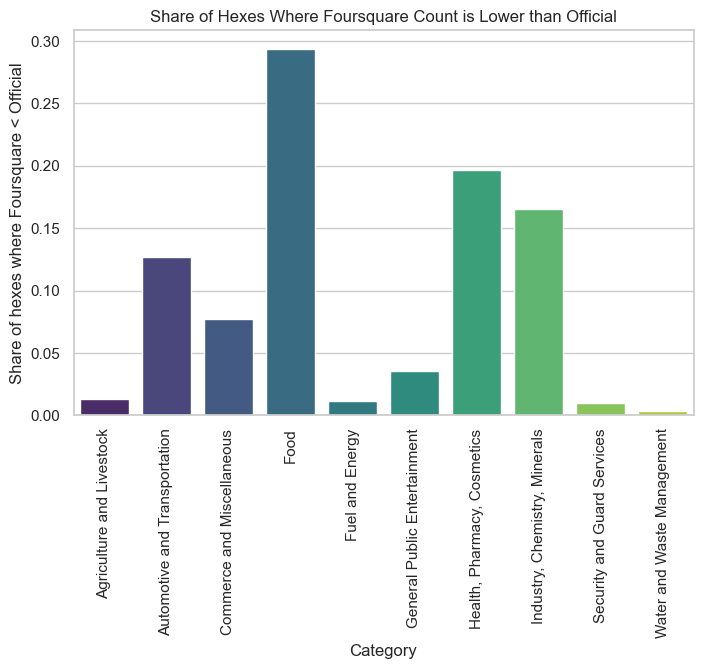

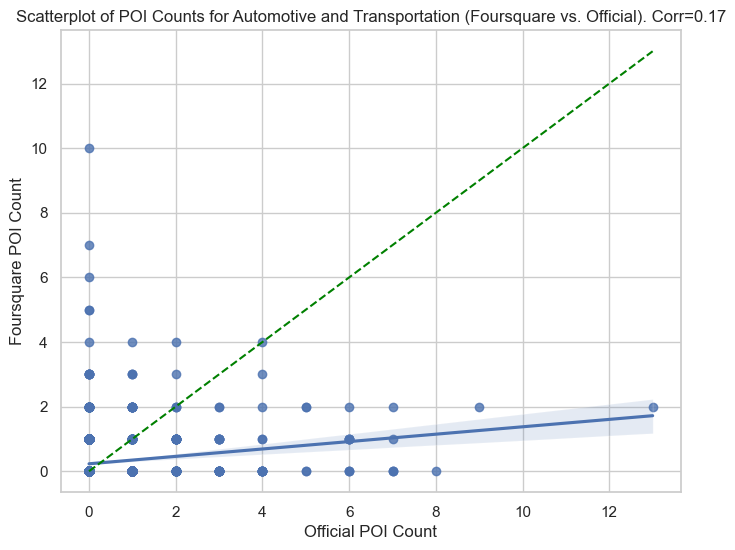

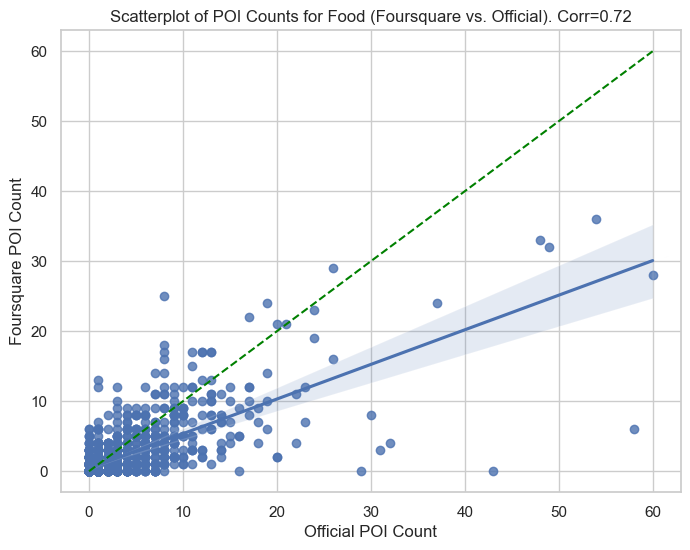

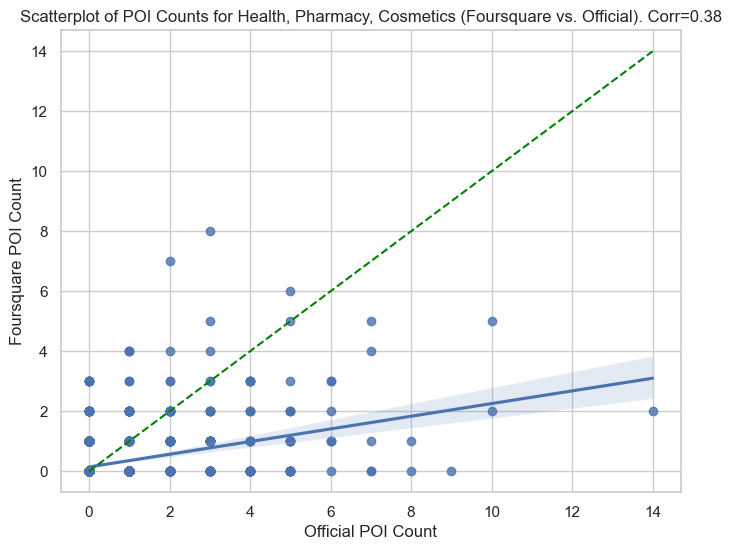

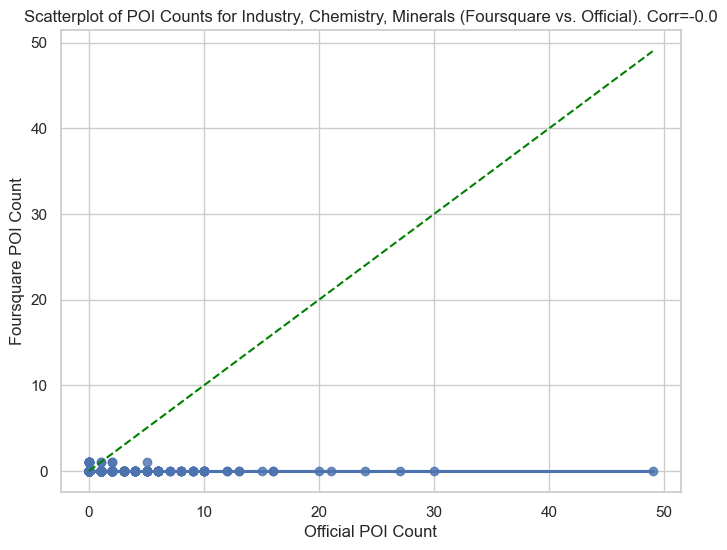

In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create pivot tables
pivot_hex_category_frsq = pd.pivot_table(
    ta_frsq_gdf, index='hex', columns=["official_business_category"], values='name', aggfunc='count'
).fillna(0)

pivot_hex_category_official = pd.pivot_table(
    ta_official_gdf, index='hex', columns=["business_category"], values='business_name', aggfunc='count'
).fillna(0)

# Compute difference table
diff_table = pivot_hex_category_frsq - pivot_hex_category_official


sns.set_theme(style="whitegrid")

# Histogram: Share of hexes where Foursquare < Official
plt.figure(figsize=(8, 5))
less_than_official_share = (diff_table < 0).mean(axis=0)  # Compute fraction per category
sns.barplot(x=less_than_official_share.index, y=less_than_official_share.values, palette="viridis")  # Changed color palette
plt.xticks(rotation=90)
plt.ylabel("Share of hexes where Foursquare < Official")
plt.xlabel("Category")
plt.title("Share of Hexes Where Foursquare Count is Lower than Official")
plt.show()

# # Histogram for each category (pretty version)
# for c in diff_table.columns:
#     plt.figure(figsize=(7, 5))
#     sns.histplot(diff_table[c], bins=20, kde=True, color="royalblue", edgecolor="black")
#     plt.axvline(0, color='red', linestyle='dashed', linewidth=1)
#     plt.xlabel("Difference (Foursquare - Official)")
#     plt.ylabel("Count of Hexes")
#     plt.title(f"Distribution of Differences for {c}")
#     plt.show()

# Scatter plot for each category with biggest difference
columns_diff = less_than_official_share[less_than_official_share>0.1].index
for c in columns_diff:
    joined_df = pivot_hex_category_official[c].rename("Dataset1").to_frame().join(pivot_hex_category_frsq[c].rename("Dataset2").to_frame(), how='outer').fillna(0)
    corr = joined_df.corr().iloc[0,1].round(2)
    plt.figure(figsize=(8, 6))
    sns.regplot(
        x=joined_df["Dataset1"],
        y=joined_df["Dataset2"]
    )
    plt.plot([0, max(pivot_hex_category_official[c].max(), pivot_hex_category_frsq[c].max())], 
             [0, max(pivot_hex_category_official[c].max(), pivot_hex_category_frsq[c].max())], 
             'r--', color='green')  # Identity line
    plt.xlabel("Official POI Count")
    plt.ylabel("Foursquare POI Count")
    plt.title(f"Scatterplot of POI Counts for {c} (Foursquare vs. Official). Corr={corr}")
    plt.show()


## Test areas with the most extreme error

In [204]:
food_hex_lost = diff_table[diff_table['Food']<-30].index.values
ta_official_gdf[ta_official_gdf.hex.isin(food_hex_lost)][['geometry','business_name']].explore()

In [208]:
ta_frsq_gdf[ta_frsq_gdf.hex.isin(food_hex_lost)][['geometry','name','keyword', 'hex']].explore()

#### All 3 areas represent markets!

### Levinski market

In [215]:
ta_frsq_gdf[ta_frsq_gdf.hex=='8a2db0cc2aeffff'].groupby(['hex','type']).size()

hex              type                  
8a2db0cc2aeffff  Arts and Entertainment     2
                 Dining and Drinking       22
                 Retail                    11
dtype: int64

In [217]:
ta_official_gdf[ta_official_gdf.hex=='8a2db0cc2aeffff'].groupby(['hex','business_category']).size()

hex              business_category            
8a2db0cc2aeffff  Commerce and Miscellaneous        1
                 Food                             60
                 Health, Pharmacy, Cosmetics       2
                 Industry, Chemistry, Minerals     3
dtype: int64

In [220]:
ta_official_gdf[(ta_official_gdf.hex=='8a2db0cc2aeffff')&(ta_official_gdf.business_name!='nan')].groupby(['hex','business_category']).size()

hex              business_category            
8a2db0cc2aeffff  Commerce and Miscellaneous        1
                 Food                             44
                 Health, Pharmacy, Cosmetics       2
                 Industry, Chemistry, Minerals     1
dtype: int64

### If needed, we can explore places with 0 foursquare

# 8. Map deltas. Draw choropleth with hexes to check spatial coverage

In [ ]:
import h3
from shapely.geometry import Polygon
def hex_to_polygon(hex_id):
    """Convert H3 hex ID to Shapely Polygon"""
    boundary = h3.cell_to_boundary(hex_id)
    boundary = [(lon, lat) for lat, lon in boundary]
    return Polygon(boundary)


In [ ]:

import contextily as ctx
import matplotlib.pyplot as plt
import seaborn as sns

def plot_hex_comparison_jenks(hex_gdf, column, title="Hex Comparison", cmap="coolwarm", figsize=(12, 8), k=5, add_basemap=True):
    """
    Plots a GeoDataFrame using Jenks natural breaks classification for better visualization with optional basemap.

    Parameters:
    hex_gdf (GeoDataFrame): The GeoDataFrame containing hex geometries and data.
    column (str): The column to visualize.
    title (str, optional): The title of the plot. Defaults to "Hex Comparison".
    cmap (str, optional): Colormap for visualization. Defaults to "coolwarm".
    figsize (tuple, optional): Figure size. Defaults to (12, 8).

    add_basemap (bool, optional): Whether to add a basemap using contextily. Defaults to True.
    """
    sns.set_style("white")  # Set a clean background style
    fig, ax = plt.subplots(figsize=figsize)  # Increase figure size

    # Convert to Web Mercator projection if adding basemap
    if add_basemap:
        hex_gdf = hex_gdf.to_crs(epsg=3857)

    # Plot the hex map with classified values
    hex_gdf.plot(column=column, cmap=cmap, edgecolor='black', linewidth=0.3, legend=True, ax=ax, alpha=0.7)

    # Add contextily basemap if requested
    if add_basemap:
        ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, alpha=0.5, crs=3857)

    # Customize plot aesthetics
    ax.set_title(title, fontsize=14, fontweight="bold")
    ax.set_axis_off()  # Remove axis for better visualization

    # Show plot
    plt.show()

## All categories

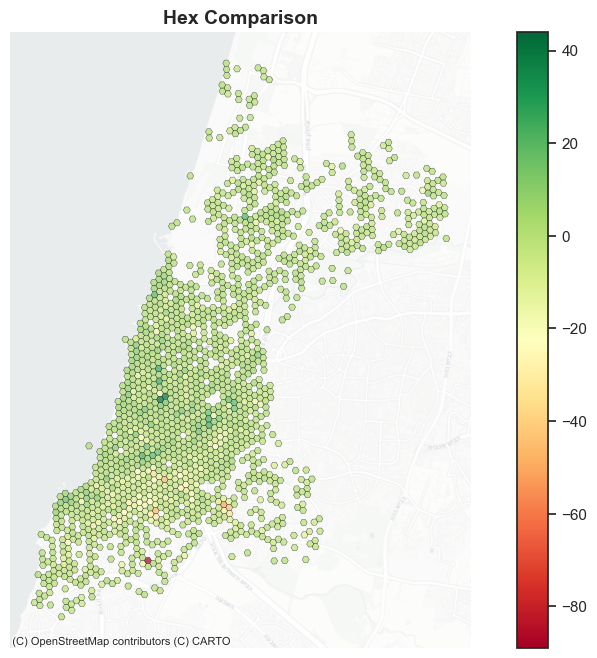

In [284]:

df_hex_summary, hex_comparison_cat = compare_poi_hex_statistics_df(
    ta_frsq_gdf,
    ta_official_gdf,
    name1="Foursquare",
    name2="Official Data",
    resolution=10,
)
hex_comparison_cat["geometry_hex"] = hex_comparison_cat['hex'].apply(hex_to_polygon)
hex_comparison_cat = gpd.GeoDataFrame(hex_comparison_cat, geometry ="geometry_hex", crs=4326)
hex_comparison_cat = hex_comparison_cat.fillna(0)
hex_comparison_cat['diff'] = hex_comparison_cat['Foursquare']-hex_comparison_cat['Official Data']
## If you want to run it with basemap, then time increases significantly and you need internet connection
plot_hex_comparison_jenks(hex_comparison_cat, column='diff', cmap='RdYlGn')

Food


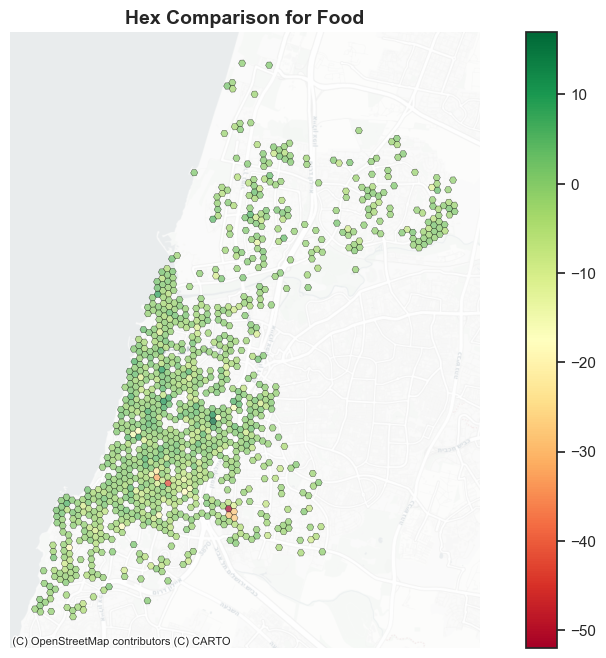

Health, Pharmacy, Cosmetics


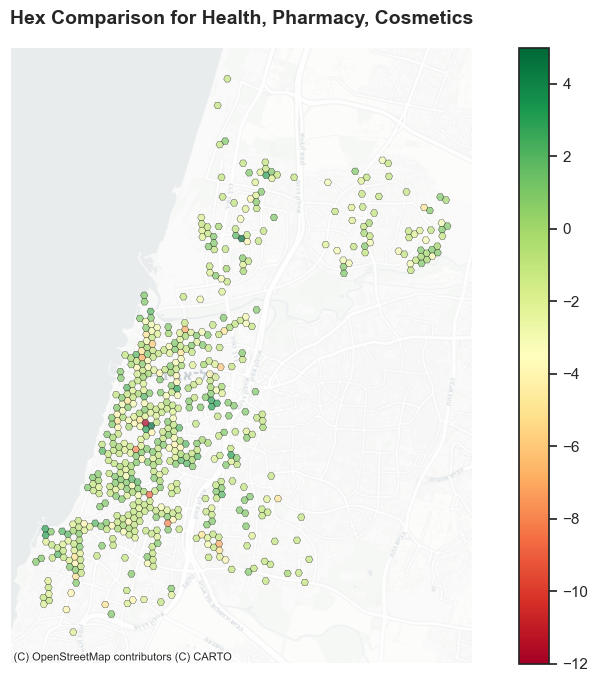

Commerce and Miscellaneous


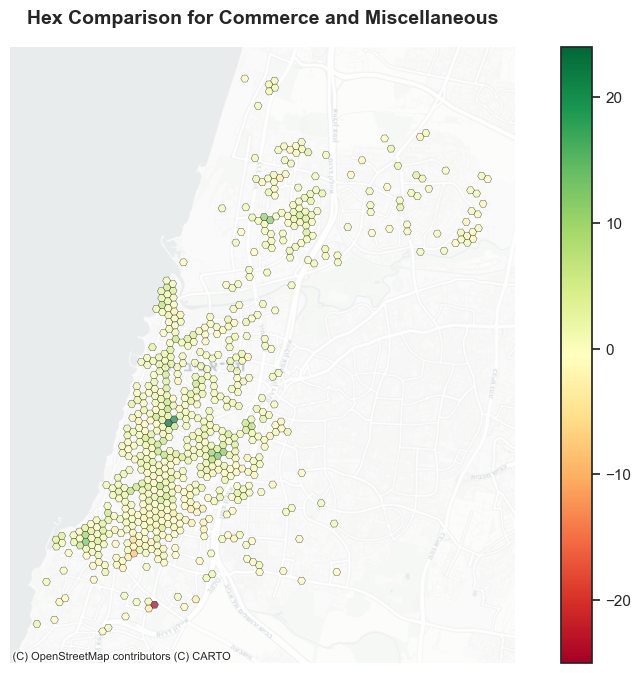

Automotive and Transportation


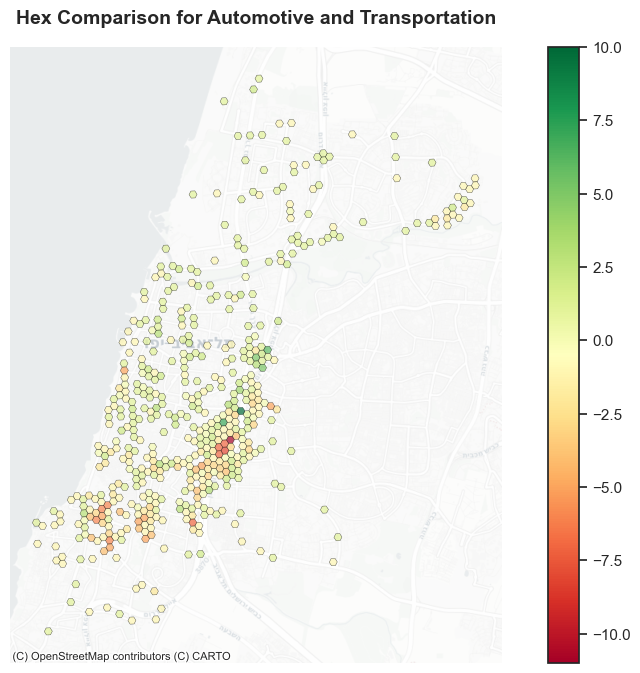

Industry, Chemistry, Minerals


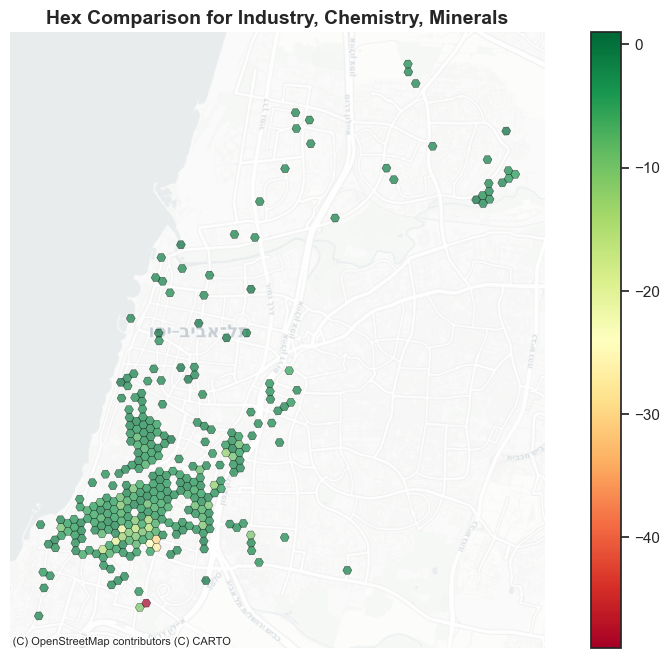

General Public Entertainment


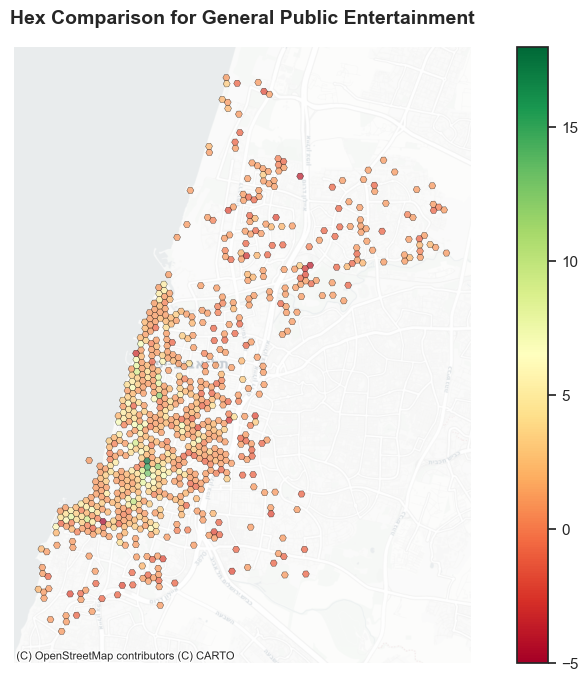

Water and Waste Management


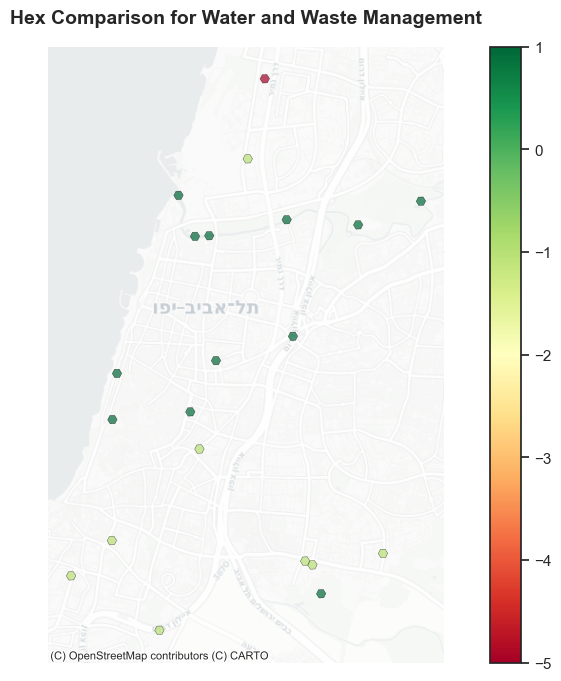

Agriculture and Livestock


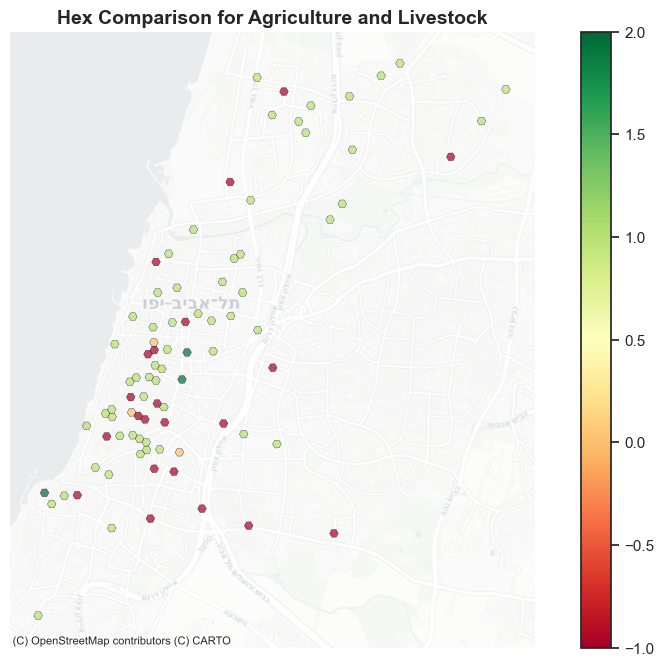

None


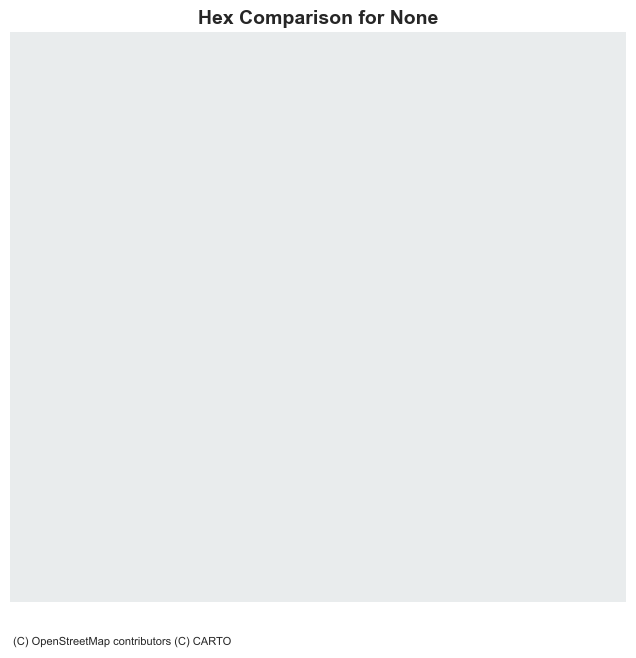

Security and Guard Services


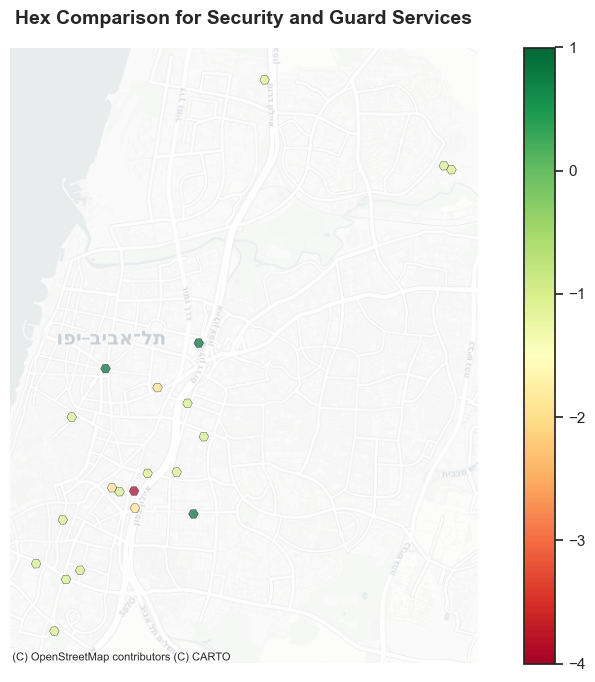

Fuel and Energy


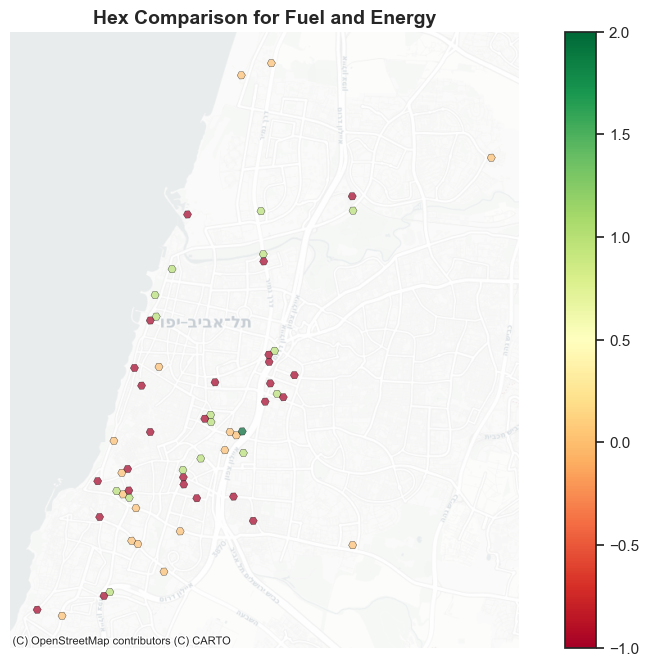

In [286]:
for cat in ta_official_gdf['business_category'].unique():
    print(cat)
    df_hex_summary, hex_comparison_cat = compare_poi_hex_statistics_df(
        ta_frsq_gdf[ta_frsq_gdf['official_business_category']==cat],
        ta_official_gdf[ta_official_gdf['business_category']==cat],
        name1="Foursquare",
        name2="Official Data",
        resolution=10,
    )
    hex_comparison_cat["geometry_hex"] = hex_comparison_cat['hex'].apply(hex_to_polygon)
    hex_comparison_cat = gpd.GeoDataFrame(hex_comparison_cat, geometry ="geometry_hex", crs=4326)
    hex_comparison_cat = hex_comparison_cat.fillna(0)
    hex_comparison_cat['diff'] = hex_comparison_cat['Foursquare']-hex_comparison_cat['Official Data']
    ## If you want to run it with basemap, then time increases significantly and you need internet connection
    plot_hex_comparison_jenks(hex_comparison_cat, column='diff', cmap='RdYlGn',title = f"Hex Comparison for {cat}")
    plt.show()